In [2]:
workspace()

module phys_consts
    export CL,G,QE,MSOL,MSUN,ARAD,SGMB,RGAS,
            PC,RSUN,RSUN,YR,MSOLYR,GAM53,KPE,PARSEC,KPE,KPD,M_MW
    CL = 2.997925E10;
    G = 6.67384E-8; 
    QE=4.80325E-10;
    MSOL = 1.989E33;
    MSUN = 1.989E33;
    ARAD = 7.56464E-15; 
    SGMB = ARAD*CL/4;
    RGAS = 8.31E7; 
    PC = 3.085678E18;
    MP = 1.672661E-24; 
    M_U = 1.660531E-24;    
    RSUN = 6.95E10;
    YR = 365.*24.*3600.;
    MSOLYR = 1.989e33/YR;

    GAM53 = 5./3.;
    KPE = 0.4;  
    KPD = 10.;
    M_MW=1.;
end

module Model_mod

#     export par, MyMod
# ,   mymod

    struct ModelParams
    
        Rsc::Float64   
        nc0::Float64
    
#         r_small :: Float64 
    
#         L_box   :: Float64   
#         Lhalf :: Float64
#         Nx :: Int16
#         Ny :: Int16
#         Nz :: Int16    

    
    end    
    
#     function ModelParams(R, r)
#         Rsc = R
#         r_small = 0
#     end

#     struct MyMod
#         r_small :: Float64 
#         L_box   :: Float64   
#         Lhalf :: Float64
#         Nx :: Int16
#         Ny :: Int16
#         Nz :: Int16    
#     #     R_0
#     #     L_box,
#     #     Lhalf = div(L_box,2)
#     end

   
  
end 



# function tor((rho, xx, yy, zz, h, R_in, R_out, Nx)
    
#     for i in eachindex(xx), j in eachindex(yy), k in eachindex(zz)       
        
#         r = (xx[i]^2 + yy[j]^2)^1/2        
        
#        if  (abs(zz[k]) < h) & (r > R_in) & (r<R_out) 
#             rho[i,j,k] = 1.             
#        else                   
#          rho[i,j,k]=eps(Float64)
#        end
        
# #        @show i,j,k,rho[i,j,k]
    
#     end
    
#     return(rho)

# end

#     r_small = 1
#     R_0 = 10
                         
#     for x in xx, z in zz                   
#         r = ((x-R_0)^2 + (z - 0.).^2)^1/2                    
#         if r < r_0
#                 rho = 1   
       
#         else                
#             rho = eps;            
#         end
#     #         println(r)                            
#     end    
#     #     rho =   x.^2 + y.^2;    
# end

# dat = Model_mod.Model(1, 10., 10, 5, 3)
# println(dat.r_small)

In [58]:
# reload("Model_mod")

In [2]:
# function disk(rho::Float64, xx::Float64, yy::Float64, zz::Float64, h::Float64, R_in::Float64, R_out::Float64, Nx::Int, nd::Float64)    
function disk(rho, xx, yy, zz, h, R_in, R_out, Nx, nd)    

    for i in eachindex(xx), j in eachindex(yy), k in eachindex(zz)       
        r = (xx[i]^2 + yy[j]^2)^1/2        
       if  (abs(zz[k]) < h) & (r > R_in) & (r<R_out) 
            rho[i,j,k] = nd             
       else                   
         rho[i,j,k] = 10.
       end
#        @show i,j,k,rho[i,j,k]
    end

    return(rho)
end

disk (generic function with 1 method)

In [3]:

import phys_consts: PC
import phys_consts: PC
import Model_mod: ModelParams

# function disk(rho::Float64, xx::Float64, yy::Float64, zz::Float64, h::Float64, R_in::Float64, R_out::Float64, Nx, nd::Float64)    

#     for i in eachindex(xx), j in eachindex(yy), k in eachindex(zz)       
#         r = (xx[i]^2 + yy[j]^2)^1/2        
#        if  (abs(zz[k]) < h) & (r > R_in) & (r<R_out) 
#             rho[i,j,k] = nd             
#        else                   
#          rho[i,j,k] = 10.
#        end
# #        @show i,j,k,rho[i,j,k]
#     end

#     return(rho)
# end


function main()
 
    # ModelParams(R) = ModelParams(R, 0.01)

    par = ModelParams(PC, 1e8);

    @show par.Rsc  par.nc0
                

    # Dust grains
    # a = 1e-4
    # Md = (4/3)π * a^3* ρ_d

    
    nh  = 0.5*par.nc0
    
    Agr = 9.5e-12 #D. Namekata,‹ M. Umemura and K. Hasegawa
    
    ngr  = nh * Agr
    
    @show ngr, nh Agr
    
    h = 3.

    L_box = 10.
    Lhalf = div(L_box,2)

    R_in = 0.2*Lhalf


    R_out = Lhalf

    Nx = 10
    Ny = Nx
    Nz = Nx

    @show Nx*Ny*Nz

    xx = linspace(-Lhalf,  Lhalf,  Nx)
    yy = linspace(-Lhalf,  Lhalf,  Ny)    
    zz = linspace(-Lhalf,  Lhalf,  Nz)    
@show typeof(xx)
    rho = zeros(Float64, Nx, Ny, Nz);

    disk(rho, xx, yy, zz, h, R_in, R_out, Nx, ngr) 

    Xsc = par.Rsc
    Nsc = ngr
    
    file = "/Users/dora/WORK/SCRIPTS/torus_prof.dat"
    f =open(file , "w")
    write(f, "Fortran-style, i.e. column-major indexing: F(i,j,k) \n\n")    
    write(f, "Nx =$Nx, Ny=$Ny, Nz=$Nz \n\n")

    write(f, "x-coord [cm] \n")
    for x in xx
        @printf(f, "%e \n", x*Xsc) 
    end

    write(f, "\n  y-coord [cm] \n")
    for y in yy
        @printf(f, "%e \n", y*Xsc) 
    end

    write(f, "\n z-coord [cm] \n")
    for z in zz
        @printf(f, "%e \n", z*Xsc) 

    end


    write(f, "\n
    dust number density [particle cm^-3], rho[i,j,k], 
    template:
    for  k in 1:$Nz
      for j in $Ny
        for i in $Nz\n") 

    for  k in eachindex(zz) 
        for j in eachindex(yy) 
            for i in eachindex(xx)
#                 @show(i,j,k)
                @printf(f, "%e \n", rho[i,j,k] * Nsc) 
            end
    " loop j "  end
    " loop k " end

    close(f)

"end main" end 

tic()
main()
toc()
"done"


par.Rsc = 3.085678e18
par.nc0 = 1.0e8
(ngr, nh) = (0.000475, 5.0e7)
Agr = 9.5e-12
Nx * Ny * Nz = 1000
typeof(xx) = StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
elapsed time: 0.405946786 seconds


"done"

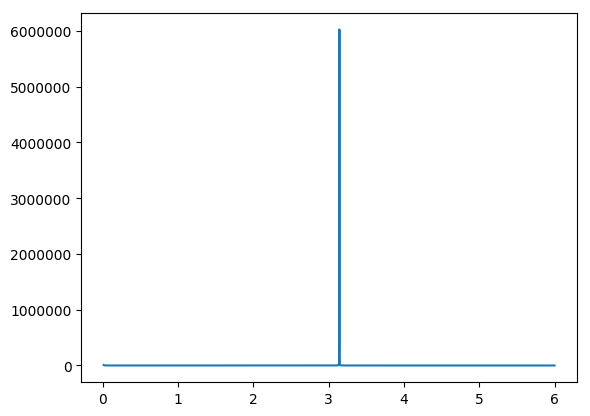

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1308b7810>

In [6]:
using PyPlot
import Plots

function f(x)
    y = x^2
    return (y)
end

x = 0.01:0.001:6

y = 1./sin.(x).^2

plt=plot(x,y)

In [6]:
import phys_consts: PC, KPD, KPE, MP

numd = 1e8

@show den  = numd*MP

@show tau = PC*KPE*den

1/(PC*KPE*MP)

1/(PC*KPD*MP)


den = numd * MP = 1.6726610000000002e-16
tau = PC * KPE * den = 206.45172996632002


19374.989013909202

0.000475

Dust density: 

$\rho_d$, Opacity: ${\displaystyle \tau_d = \int_0^r\, \kappa_d \,\rho\,d r}$


In [3]:
Γ_e =  4π CL G M/κ

LoadError: [91msyntax: extra token "CL" after end of expression[39m

In [5]:
import Elliptic

LoadError: [91mArgumentError: Module Elliptic not found in current path.
Run `Pkg.add("Elliptic")` to install the Elliptic package.[39m

In [5]:
Pkg.add("PyCall");

INFO: Package PyCall is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyCall
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
using PyCall


INFO: Recompiling stale cache file /Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/lib/v0.6/PyCall.ji for module PyCall.


In [5]:
unshift!(PyVector(pyimport("sys")["path"]),"/Users/dora/WORK/SCRIPTS");

In [7]:
# from AthenaModelVTK import *
@pyimport AthenaModelVTK 

In [4]:
using Elliptic

LoadError: [91mArgumentError: Module Elliptic not found in current path.
Run `Pkg.add("Elliptic")` to install the Elliptic package.[39m

In [3]:
Pkg.add("Elliptic")

LoadError: [91m[91mresolve is unable to satisfy package requirements.
  The problem was detected when trying to find a feasible version
  for package Compat.
  However, this only means that package Compat is involved in an
  unsatisfiable or difficult dependency relation, and the root of
  the problem may be elsewhere.
[39m
resolve(::Dict{String,Base.Pkg.Types.VersionSet}, ::Dict{String,Dict{VersionNumber,Base.Pkg.Types.Available}}) at ./pkg/resolve.jl:48
resolve(::Dict{String,Base.Pkg.Types.VersionSet}, ::Dict{String,Dict{VersionNumber,Base.Pkg.Types.Available}}, ::Dict{String,Tuple{VersionNumber,Bool}}, ::Dict{String,Base.Pkg.Types.Fixed}, ::Dict{String,VersionNumber}, ::Set{String}) at ./pkg/entry.jl:499
resolve(::Dict{String,Base.Pkg.Types.VersionSet}, ::Dict{String,Dict{VersionNumber,Base.Pkg.Types.Available}}, ::Dict{String,Tuple{VersionNumber,Bool}}, ::Dict{String,Base.Pkg.Types.Fixed}) at ./pkg/entry.jl:479
edit(::Function, ::String, ::Base.Pkg.Types.VersionSet, ::Vararg{Base.Pkg.Types.VersionSet,N} where N) at ./pkg/entry.jl:30
(::Base.Pkg.Entry.##1#3{String,Base.Pkg.Types.VersionSet})() at ./task.jl:335[39m